EJERCICIO DE REGRESION LINEAL  - GIOVANNY GUACA CAMPO

Pasos de la Actividad Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características Dividir el dataset en Train y Test para evaluar correctamente el modelo Entrenar el modelo configurando los diferentes hiperparámetros Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc Realizar las diferentes gráficas que permitan visualizar los resultados del modelo. Interpretar, analizar y documentar los resultados obtenidos Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/


1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [6]:
# EJERCICIO DE REGRESION LINEAL - GIOVANNY GUACA CAMPO
#importacion de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
pd.options.display.float_format = '{:.1f}'.format #presentar datos numericos como float


In [2]:
Datos = pd.read_csv('./Car details v3.csv') #asignamos el dataset a la variable Datos
Datos['engine_2'] = Datos['engine'].str.extract('(\d+\.?\d*)').astype(float) # Le quitamos los caracteres alfabeticos a la variable engine
Datos['engine'] = Datos['engine_2']

In [4]:
Datos.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,engine_2
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74 bhp,190Nm@ 2000rpm,5.0,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1498.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,1497.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1396.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,1298.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197.0,81.86 bhp,113.75nm@ 4000rpm,5.0,1197.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061.0,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,1061.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796.0,37 bhp,59Nm@ 2500rpm,4.0,796.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364.0,67.1 bhp,170Nm@ 1800-2400rpm,5.0,1364.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399.0,68.1 bhp,160Nm@ 2000rpm,5.0,1399.0


In [7]:

Datos.describe()

,year,selling_price,km_driven,engine,seats,engine_2
count,8128.0,8128.0,8128.0,7907.0,7907.0,7907.0
mean,2013.8,638271.8,69819.5,1458.6,5.4,1458.6
std,4.0,806253.4,56550.6,503.9,1.0,503.9
min,1983.0,29999.0,1.0,624.0,2.0,624.0
25%,2011.0,254999.0,35000.0,1197.0,5.0,1197.0
50%,2015.0,450000.0,60000.0,1248.0,5.0,1248.0
75%,2017.0,675000.0,98000.0,1582.0,5.0,1582.0
max,2020.0,10000000.0,2360457.0,3604.0,14.0,3604.0


Text(0.5, 1.0, 'Identificacion de Datos faltantes y atípicos')

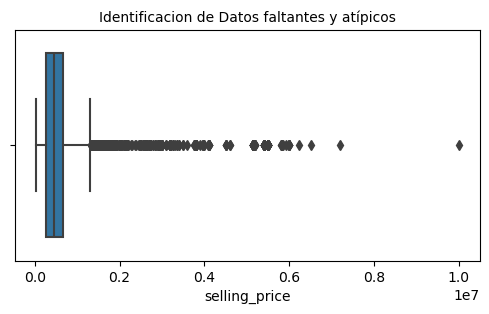

In [8]:

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['selling_price'])
plt.title('Identificacion de Datos faltantes y atípicos', fontsize=10) #Dado el precio de vehiculos en subasta los precios no se consideraran outliers

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [9]:
#Conteo de registros con valores 0 y Nulos NaN
print("Cantidad de registros con cero en name: ",Datos['name'].isin([0]).sum())
print("Cantidad de registros con cero en year: ",Datos['year'].isin([0]).sum())
print("Cantidad de registros con cero en selling_price: ",Datos['selling_price'].isin([0]).sum())
print("Cantidad de registros con cero en km_driven: ",Datos['km_driven'].isin([0]).sum())
print("Cantidad de registros con cero en fuel: ",Datos['fuel'].isin([0]).sum())
print("Cantidad de registros con cero en seller_type: ",Datos['seller_type'].isin([0]).sum())
print("Cantidad de registros con cero en transmission: ",Datos['transmission'].isin([0]).sum())
print("Cantidad de registros con cero en owner: ",Datos['owner'].isin([0]).sum())
print("Cantidad de registros con cero en mileage: ",Datos['mileage'].isin([0]).sum())
print("Cantidad de registros con cero en engine: ",Datos['engine'].isin([0]).sum())
print("Cantidad de registros con cero en max_power: ",Datos['max_power'].isin([0]).sum())
print("Cantidad de registros con cero en torque: ",Datos['torque'].isin([0]).sum())
print("Cantidad de registros con cero en seats: ",Datos['seats'].isin([0]).sum())
print("Cantidad de registros con Nan en name: ",Datos['name'].isnull().sum())
print("Cantidad de registros con Nan en year: ",Datos['year'].isnull().sum())
print("Cantidad de registros con Nan en selling_price: ",Datos['selling_price'].isnull().sum())
print("Cantidad de registros con Nan en km_driven: ",Datos['km_driven'].isnull().sum())
print("Cantidad de registros con Nan en fuel: ",Datos['fuel'].isnull().sum())
print("Cantidad de registros con Nan en seller_type: ",Datos['seller_type'].isnull().sum())
print("Cantidad de registros con Nan en transmission: ",Datos['transmission'].isnull().sum())
print("Cantidad de registros con Nan en owner: ",Datos['owner'].isnull().sum())
print("Cantidad de registros con Nan en mileage: ",Datos['mileage'].isnull().sum())
print("Cantidad de registros con Nan en engine: ",Datos['engine'].isnull().sum())
print("Cantidad de registros con Nan en max_power: ",Datos['max_power'].isnull().sum())
print("Cantidad de registros con Nan en torque: ",Datos['torque'].isnull().sum())
print("Cantidad de registros con Nan en seats: ",Datos['seats'].isnull().sum())

Cantidad de registros con cero en name:  0
Cantidad de registros con cero en year:  0
Cantidad de registros con cero en selling_price:  0
Cantidad de registros con cero en km_driven:  0
Cantidad de registros con cero en fuel:  0
Cantidad de registros con cero en seller_type:  0
Cantidad de registros con cero en transmission:  0
Cantidad de registros con cero en owner:  0
Cantidad de registros con cero en mileage:  0
Cantidad de registros con cero en engine:  0
Cantidad de registros con cero en max_power:  0
Cantidad de registros con cero en torque:  0
Cantidad de registros con cero en seats:  0
Cantidad de registros con Nan en name:  0
Cantidad de registros con Nan en year:  0
Cantidad de registros con Nan en selling_price:  0
Cantidad de registros con Nan en km_driven:  0
Cantidad de registros con Nan en fuel:  0
Cantidad de registros con Nan en seller_type:  0
Cantidad de registros con Nan en transmission:  0
Cantidad de registros con Nan en owner:  0
Cantidad de registros con Nan en

In [10]:
Datos.isnull().sum()*100/Datos.shape[0]

name            0.0
year            0.0
selling_price   0.0
km_driven       0.0
fuel            0.0
seller_type     0.0
transmission    0.0
owner           0.0
mileage         2.7
engine          2.7
max_power       2.6
torque          2.7
seats           2.7
engine_2        2.7
dtype: float64

In [11]:

Datos= Datos.dropna() #eliminamos valores nulos


In [12]:
print("Cantidad de registros con Nan en mileage: ",Datos['mileage'].isnull().sum())
print("Cantidad de registros con Nan en engine: ",Datos['engine'].isnull().sum())
print("Cantidad de registros con Nan en max_power: ",Datos['max_power'].isnull().sum())
print("Cantidad de registros con Nan en torque: ",Datos['torque'].isnull().sum())
print("Cantidad de registros con Nan en seats: ",Datos['seats'].isnull().sum())

Cantidad de registros con Nan en mileage:  0
Cantidad de registros con Nan en engine:  0
Cantidad de registros con Nan en max_power:  0
Cantidad de registros con Nan en torque:  0
Cantidad de registros con Nan en seats:  0


In [13]:
Datos.isnull().sum()*100/Datos.shape[0] #no hay valores nulos

name            0.0
year            0.0
selling_price   0.0
km_driven       0.0
fuel            0.0
seller_type     0.0
transmission    0.0
owner           0.0
mileage         0.0
engine          0.0
max_power       0.0
torque          0.0
seats           0.0
engine_2        0.0
dtype: float64

In [14]:
Datos.info() #Se eliminan 221 registros con valores NaN ya que representan un pocertaje muy minimo del total de datos

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   float64
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
 13  engine_2       7906 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 926.5+ KB


3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
Característica de interes:

selling_price: determinar el precio de venta del vehiculo
Predecir el precio de venta del vehiculo

In [15]:
Datos['selling_price'].value_counts()

selling_price
300000    221
600000    211
350000    204
550000    204
450000    194
         ... 
67500       1
66000       1
312000      1
298000      1
746000      1
Name: count, Length: 670, dtype: int64

In [16]:
Datos['selling_price'].head(10)

0    450000
1    370000
2    158000
3    225000
4    130000
5    440000
6     96000
7     45000
8    350000
9    200000
Name: selling_price, dtype: int64

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [17]:
Datos = Datos[['selling_price', 'year','km_driven','engine','seats']]
X = Datos.drop('selling_price',axis=1)
Y = Datos['selling_price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, random_state = 0 )


In [18]:
print(X_train)

      year  km_driven  engine  seats
1075  2016      94000  2755.0    7.0
3139  2015      90000  1498.0    5.0
1682  2015      20000  1248.0    5.0
5555  2018      50000   998.0    5.0
6571  2016      11000  1598.0    5.0
...    ...        ...     ...    ...
5074  2011     105000  1497.0    5.0
3367  2016      38000  1197.0    5.0
1703  2015      35000  1497.0    7.0
2694  2013     173000  2179.0    7.0
2821  2007     100000  1405.0    5.0

[5929 rows x 4 columns]


In [ ]:
print(Y_train)

1075    1825000
3139     455000
1682     700000
5555     459999
6571     645000
         ...   
5074     421000
3367     540000
1703     500000
2694     479000
2821     130000
Name: selling_price, Length: 5929, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros

In [19]:
#modelo_regresion = LogisticRegression(solver = 'liblinear')
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train,Y_train)
Prediccion = modelo_regresion.predict(X_test)


In [20]:
print(Y_test)

4048     430000
4831     779000
5123     200000
6505     800000
46       390000
         ...   
7345     650000
6569    5500000
3627     430000
6038     200000
1860    4100000
Name: selling_price, Length: 1977, dtype: int64


In [21]:
print(Prediccion)

[ 753868.71379519  950709.64796853  355673.73374131 ...  578403.6323114
  414308.58260259 3497001.60562235]


6. Evaluar el desempeño del modelo en el conjunto de Test con R2

In [22]:
r2 = r2_score(Y_test, Prediccion) #R cuadrado
print("R cuadrado: ", r2)

R cuadrado:  0.46624267398990604


7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

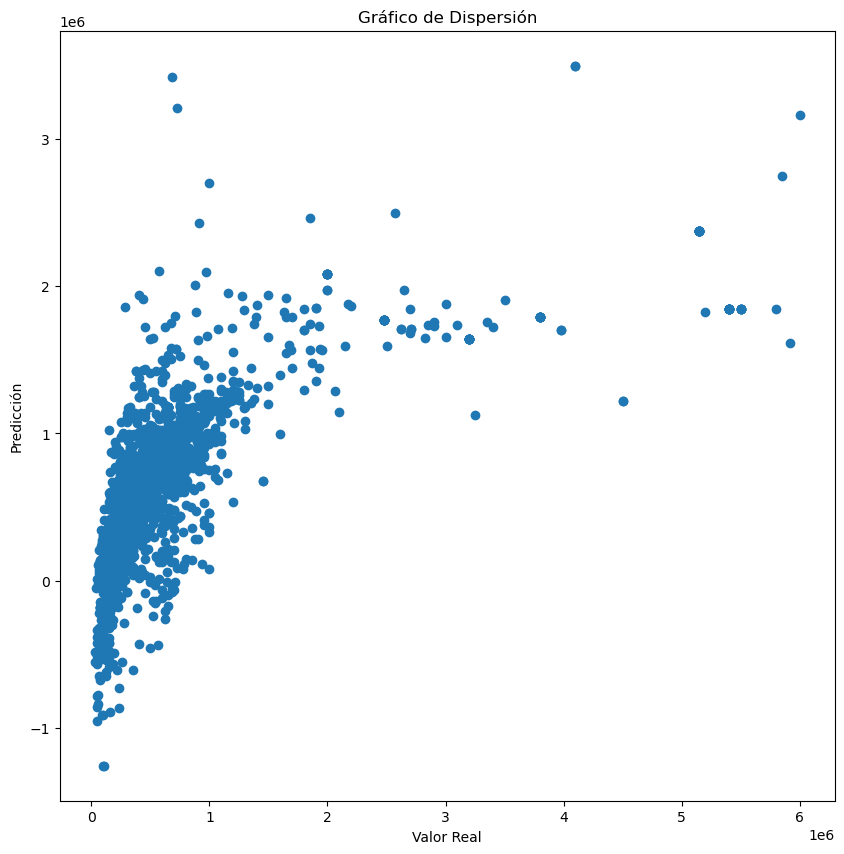

In [23]:
plt.figure(figsize=(10, 10))
plt.scatter(Y_test, Prediccion)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Gráfico de Dispersión')
plt.show()

C:\Users\silve\AppData\Local\Temp\ipykernel_3332\31925789.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test - Prediccion), bins = 20)
C:\Users\silve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Errors')

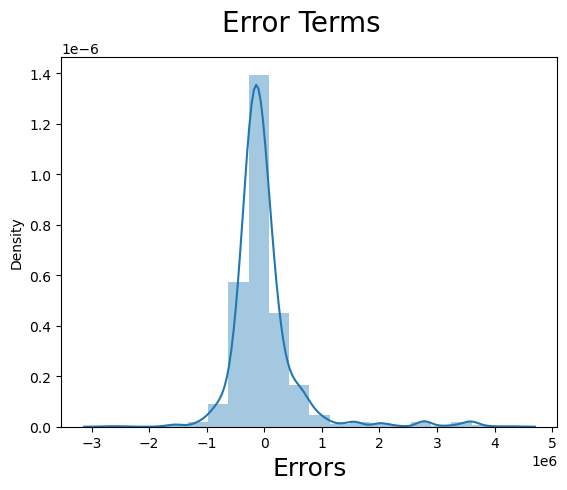

In [30]:
fig = plt.figure()
sns.distplot((Y_test - Prediccion), bins = 20)
#sns.histplot((Y_test - Prediccion), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label